# Agrupación espacial basado en densidad de aplicaciones con ruido (DBSCAN)

**DESCRIPCIÓN**:

Gutiérrez-Silva, Juan Alberto (2023).

Basado en Ester et al. (1996) **(1)**

Algoritmo de agrupamiento o clustering espacial de múltiples usos.

Datos de entrada:
Archivo CSV organizado de la siguiente manera:

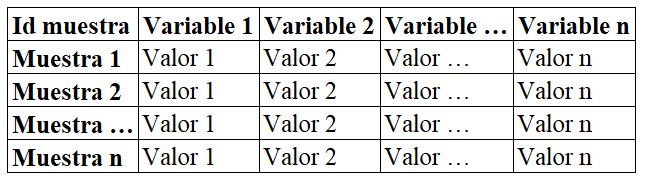

Los valores deben estar separados por comas y usar puntos para marcar decimales.

**(1)** Ester, M., Kriegel, H. P., Sander, J., & Xu, X. (1996, August). A density-based algorithm for discovering clusters in large spatial databases with noise. In kdd (Vol. 96, No. 34, pp. 226-231).
__________________________________________________________________________________________________________________________

**COMENTARIOS:** 

Los gráficos que exporta este notebook están pensados para datos con más de 3 variables y variables que indiquen porcentajes (por eso la extensión de 0 a 100 en el eje Y, esta opción es personalizable). Para datos de 2 variables es más adecuado un scatterplot.

Para evitar fallos es recomendable limpiar el output antes de cada intento, reiniciar el kernel y correr el notebook completo.

Uso libre.

________________________________________________________

Importación de librerías

In [ ]:
#ES IMPORTANTE TENER PREVIAMENTE INSTALADAS LAS LIBRERÍAS

import os #interactuar con el sistema
import pandas as pd #análisis de datos
from sklearn.cluster import DBSCAN #clustering
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt #gráficos
import tkinter as tk #ventanas emergentes
from tkinter import filedialog, simpledialog, messagebox
import numpy as np #cálculos

Importación de los datos

In [ ]:
root = tk.Tk()
root.withdraw()  # Ocultar la ventana principal de Tkinter

messagebox.showinfo("Información", "Seleccione el archivo CSV con los datos.") # Crear una ventana emergente para seleccionar el archivo CSV

file_path = filedialog.askopenfilename(title="Selecciona el archivo CSV")
if not file_path:
    messagebox.showwarning("Advertencia", "No se seleccionó ningún archivo. Saliendo del programa.")
    exit()

# Cargar los datos desde el archivo CSV

data = pd.read_csv(file_path, engine='python', index_col=0) #con index_col=0 se indica que las columnas tienen nombre

Ver tipo de datos

In [ ]:
data.info()
data.head()

Variables a analizar

In [ ]:
# Solicitar el número de variables a analizar

num_variables = simpledialog.askinteger("Número de Variables", "Introduce el número de variables:")

if num_variables is None:
    messagebox.showwarning("Advertencia", "No se proporcionó el número de variables. Saliendo del programa.")
    exit()

X = data.iloc[:, :num_variables]


___________________________________________________________________________________________________________________________


**Parametrización de DBSCAN**

In [ ]:
# Normalizar los datos

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Solicitar al usuario el numero de puntos vecinos

Neighbors = simpledialog.askinteger("Neighbors", "Introduce el numero de puntos vecinos para la estimación de epsilon:")
neigh = NearestNeighbors(n_neighbors=Neighbors)
nbrs = neigh.fit(X_scaled)
distancias, indices = nbrs.kneighbors(X_scaled)

distancias = np.sort (distancias, axis=0) #ordena las distancias de menor a mayor
dist= Neighbors-1
distancias = distancias [:,dist] #selecciona la última distancia, es decir la mayor

#Crear gráfico de codo

fig = plt.figure(figsize=(7,7))
plt.plot(distancias)
plt.xlabel("puntos")
plt.ylabel("distancia")

# Agregar líneas guía al gráfico

espaciado = 1
min_dist = np.min(distancias)
max_dist = np.max(distancias)
for i in range(int(min_dist), int(max_dist), espaciado):
    plt.axhline(i, color='lightgray', linestyle='--', linewidth=0.5)
    
plt.show()
print(f'distancia: {dist}')

In [ ]:
# Solicitar al usuario el valor epsilon

Epsilon = simpledialog.askfloat("Epsilon", "Introduce el valor de epsilon , puedes usar el grafico de codo como apoyo:")

if num_variables is None:
    print("No se proporcionó el número de variables.")
    exit()
    
min_samples = Neighbors

**Nota** :Epsilon (ε) determina la distancia máxima entre dos puntos de datos para que se consideren vecinos cercanos,
ε define un radio alrededor de cada punto de datos central, y todos los puntos dentro de ese radio se consideran vecinos
del punto central.

**Clustering DBSCAN**

In [ ]:
# Crear un objeto DBSCAN y ajustarlo a los datos

dbscan = DBSCAN(eps=Epsilon, min_samples=min_samples)  #Usa los datos de ε y minimo de vecinos solicitados antes
dbscan.fit(X_scaled)

In [ ]:
# Obtener las etiquetas de clúster asignadas a cada punto de datos

cluster_labels = dbscan.labels_

# Agregar la columna de clústeres al DataFrame original

data['Cluster'] = cluster_labels

In [ ]:
# Contar el número de clusters y puntos de ruido (-1 representa ruido)

n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

# Mostrar el número de clusters y puntos de ruido

messagebox.showinfo("Información",f"Número de clusters encontrados: '{n_clusters}'.")
messagebox.showinfo("Información",f"Número de puntos de ruido: '{n_noise}'.")

# Imprimir el número de clusters y puntos de ruido

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de puntos de ruido: {n_noise}')

**Creación de los gráficos**

In [ ]:
# Transponer los datos para crear un gráfico de líneas

cluster_data = X[cluster_labels != -1].groupby(cluster_labels[cluster_labels != -1])
fig, ax = plt.subplots(figsize=(14, 5))

messagebox.showinfo("Información", "Seleccione una carpeta para guardar los gráficos.")

# Solicitar al usuario la carpeta para guardar los gráficos

output_folder = filedialog.askdirectory(title="Selecciona la carpeta para guardar los gráficos")
if not output_folder:
    messagebox.showwarning("Advertencia", "No se seleccionó ninguna carpeta.")
    exit()
    
#tipografía del gráfico

from matplotlib import rcParams
rcParams['font.family'] = 'serif'  # Puedes cambiar 'serif' por el nombre de la fuente que desees
rcParams['font.serif'] = ['Times New Roman']  # Puedes especificar una fuente específica aquí
rcParams['font.size'] = 22  # Establece el tamaño de fuente predeterminado
    
# Crear gráficos de líneas para cada clúster y guardar imágenes

unique_clusters = set(cluster_labels)
for cluster in unique_clusters:
    if cluster == -1:
        continue  # Saltar el cluster de ruido (-1)
    
    cluster_data = X[cluster_labels == cluster]
    cluster_data_transposed = cluster_data.T  # Transponer los datos para que las variables estén en el eje x

    # Configuración del gráfico
    fig, ax = plt.subplots(figsize=(24, 12))
    ax.plot(cluster_data_transposed, marker='o')
    
    # Establecer límites del eje vertical de 0 a 100
    ax.set_ylim(0, 100)

    # Etiquetas de eje y
    ax.set_ylabel('% Peso')

    # Etiquetas de eje x (nombres de variables)
    ax.set_xticks(range(num_variables))
    ax.set_xticklabels(X.columns, rotation=90)

    # Título del gráfico
    ax.set_title(f'Cluster {cluster}')
    
    # Líneas guía verticales
    for y in range(0, 101, 10):
        ax.axhline(y, color='gray', linestyle='--', alpha=0.2)

    # Calcular la cantidad de datos en el cluster actual
    num_data_points = len(cluster_data)
    
    # Agregar leyenda con la cantidad de datos
    ax.legend([f'Num_samples: {num_data_points}'], loc='upper right')
    
    # Guardar la imagen en la carpeta especificada
    output_filename = os.path.join(output_folder, f'cluster_{cluster}.png')
    plt.savefig(output_filename, bbox_inches='tight')
    plt.show()

Agregando la clasificación y exportando el archivo CSV con clústeres.

In [ ]:
# Solicitar al usuario la ubicación y el nombre del archivo para guardar los resultados

messagebox.showinfo("Información", "Seleccione una carpeta y un nombre para guardar los datos agrupados.")

output_file = filedialog.asksaveasfilename(title="Guardar archivo CSV", defaultextension=".csv")
if not output_file:
    messagebox.showwarning("Advertencia", "No se seleccionó ninguna carpeta.")
    exit()
if output_file:
    data.to_csv(output_file, index= True)
    messagebox.showinfo("Información", f"Los resultados se han guardado en '{output_file}'.")

In [ ]:
#Mensaje de aviso al final (ventana emergente)
messagebox.showinfo("Información", "¡EL PROCESO HA FINALIZADO!")

________________________________________________________